## Descrição do desafio

O problema proposto usa como base quatro datasets, cada um contendo dados de empresas abrangendo todos os tipos e setores. O primeiro dataset contem os dados de todas as empresas a serem analisadas; os outros três são subsets do primeiro e se referem ao portifolio de empresas que prestam serviços as empresas dos respectivos portifolios.

O objetivo do desafio é criar um modelo que faça recomendações de possíveis leads para as empresas que prestam serviço baseado em seus portifolios.

## Imports

In [19]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
import category_encoders as ce
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [20]:
# Import do dataset geral
EM = pd.read_csv('C:\\Users\\Luiz Guilherme\\codenation\\projeto_final\\datasets\\estaticos_market.csv')

# Import dos Dados de Portifolio
P1 = pd.read_csv('C:\\Users\\Luiz Guilherme\\codenation\\projeto_final\\datasets\\estaticos_portfolio1.csv')
P2 = pd.read_csv('C:\\Users\\Luiz Guilherme\\codenation\\projeto_final\\datasets\\estaticos_portfolio2.csv')
P3 = pd.read_csv('C:\\Users\\Luiz Guilherme\\codenation\\projeto_final\\datasets\\estaticos_portfolio3.csv')

## Análise Exploratória

In [21]:
EM.head()

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,...,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0
1,1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [22]:
P1.head()

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,COMERCIO VAREJISTA,COMERCIO,0.646575,<= 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,32e5f4e10932153a7ba869cb0386e7e02d49d2461046b8...,False,EMPRESARIO INDIVIDUAL,MA,OUTROS,COMERCIO VAREJISTA,COMERCIO,6.586301,5 a 10,...,NaN,NaN,NaN,0.0,0.0,2.0,NaN,-100.0,0.0,4
2,2,a95d6f30bba445bd3d6b0c5b36f865b38ec01d17336090...,True,EMPRESARIO INDIVIDUAL,MA,OUTROS,COMERCIO VAREJISTA,COMERCIO,8.010959,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,COMERCIO VAREJISTA,COMERCIO,20.863014,> 20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc25...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,COMERCIO VAREJISTA,COMERCIO,18.726027,15 a 20,...,39.454762,91.2,19.333333,14.0,15.0,25.0,-6.666667,-44.0,0.0,3


In [23]:
P2.head()

,Unnamed: 0,id
0,0,09e95c1a84049001d086470a8f320a19b076f955a89122...
1,1,dc9d155f5bcd3172031e2ec9431786e8871ff4b0ff4728...
2,2,16843c9ffb920170477118933798510d8d5f00f5c56c12...
3,3,ff045934d90aab184dd15e66daf3b3c97193bda5449298...
4,4,a0ce528caab2c62497a548d0ebd9e935143ef81ed7dbf0...


In [24]:
P3.head()

,Unnamed: 0,id
0,0,bb61c09449a1c1f8b78955d8b7a7f73599e78358993fe2...
1,1,16843c9ffb920170477118933798510d8d5f00f5c56c12...
2,2,1b8d092daff12bed8b3c2ab93bf5df2921865a68aca185...
3,3,3aafa3a1f12f483740a52956af100223333d0e3c79bf2c...
4,4,c60431fbca90067f105570e1e8a684bcd7048205bbf6c4...


In [25]:
EM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Columns: 182 entries, Unnamed: 0 to qt_filiais
dtypes: bool(9), float64(144), int64(2), object(27)
memory usage: 614.1+ MB


In [26]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
EM.dtypes

Unnamed: 0                                         int64
id                                                object
fl_matriz                                           bool
de_natureza_juridica                              object
sg_uf                                             object
natureza_juridica_macro                           object
de_ramo                                           object
setor                                             object
idade_empresa_anos                               float64
idade_emp_cat                                     object
fl_me                                               bool
fl_sa                                               bool
fl_epp                                              bool
fl_mei                                              bool
fl_ltda                                             bool
dt_situacao                                       object
fl_st_especial                                      bool
fl_email                       

In [27]:
# Frequencia de valores faltantes nas colunas
Nan_Ratio = pd.DataFrame((EM.isna().sum())/(len(EM))).sort_values(by=0,ascending=False)
Nan_Ratio = Nan_Ratio.rename(columns={0:'NaN Ratio'})
Nan_Ratio

,NaN Ratio
grau_instrucao_macro_desconhecido,1.000000
qt_alteracao_socio_180d,1.000000
qt_alteracao_socio_365d,1.000000
qt_alteracao_socio_total,1.000000
qt_alteracao_socio_90d,1.000000
idade_media_coligadas_baixadas,0.999706
coligada_mais_antiga_baixada,0.999706
coligada_mais_nova_baixada,0.999706
vl_total_veiculos_antt,0.999619
vl_total_tancagem,0.999394


In [28]:
EM.select_dtypes(exclude=['int64','float64']).describe()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
count,462298,462298,462298,462298,462298,462298,460371,462298,462298,462298,462298,462298,462298,462292,462298,462298,462298,462298,460371,460371,460371,460371,460371,379585,379585,460359,447447,447447,451130,43893,460371,403600,403600,460371,434785,434785
unique,462298,2,67,6,7,33,5,6,2,2,1,2,2,7334,2,2,2,2,87,21,2,2,2,2,2,27,6,5,4,2,2,19,73,2,12,11
top,2c78c5b803c2f1a130d35608dedba8346b8d96f5a63403...,True,EMPRESARIO INDIVIDUAL,MA,OUTROS,COMERCIO VAREJISTA,COMERCIO,1 a 5,False,False,False,False,False,2005-11-03,False,False,True,NAO,COMERCIO VAREJISTA,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,False,False,False,True,False,MA,VERDE,ACIMA DE 1 ANO,MEDIA,BOA,False,CENTRO AMAZONENSE,MANAUS,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00"
freq,1,433232,295756,127654,320211,172404,211224,138580,461083,453866,462298,311398,461056,69465,462230,256228,335468,236779,172404,211224,460091,457095,429687,199617,285545,124823,145430,378896,217949,43879,460030,71469,60008,264741,273861,252602


In [29]:
EM.describe()

,Unnamed: 0,idade_empresa_anos,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,nu_meses_rescencia,vl_frota,empsetorcensitariofaixarendapopulacao,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
count,462298.00000,462298.000000,280.000000,176.000000,30684.000000,30684.000000,6590.000000,460371.000000,460371.000000,1760.000000,336.000000,3683.000000,417022.000000,2.419000e+04,318469.000000,347207.000000,347207.000000,347207.000000,310696.000000,310696.000000,310696.000000,307381.000000,3251.000000,195115.000000,145029.000000,6743.000000,0.0,0.0,0.0,0.0,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,65391.000000,65391.000000,65391.000000,65391.000000,65391.000000,65391.000000,65391.000000,65391.0,65391.000000,65391.000000,65391.000000,65147.000000,65147.000000,65147.000000,136.000000,136.000000,136.000000,65391.

In [30]:
# Filtrando IDs dos portifolios no dataset principal
EM_P1 = EM[EM['id'].isin(list(P1['id']))]
EM_P2 = EM[EM['id'].isin(list(P2['id']))]
EM_P3 = EM[EM['id'].isin(list(P3['id']))]

In [31]:
EM_P1.select_dtypes(exclude=['int64','float64']).describe()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
count,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555,454,454,555,544,544,551,54,555,491,491,555,530,530
unique,555,2,6,6,2,2,3,6,2,2,1,2,1,416,1,2,2,2,8,2,1,2,2,2,2,7,6,3,4,1,1,19,66,2,7,9
top,8ca4e4affb9888154068dac9a4d520b0e200e23e43bab7...,True,EMPRESARIO INDIVIDUAL,MA,OUTROS,COMERCIO VAREJISTA,COMERCIO,1 a 5,False,False,False,False,False,2005-11-03,False,False,True,NAO,COMERCIO VAREJISTA,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,False,False,False,True,False,MA,VERDE,ACIMA DE 1 ANO,MEDIA,BOA,False,CENTRO AMAZONENSE,MANAUS,False,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00"
freq,1,519,432,157,447,496,496,157,553,546,555,337,555,100,555,300,400,311,496,496,555,551,517,286,316,156,167,453,280,54,555,78,65,442,325,296


In [32]:
EM_P1.describe()

,Unnamed: 0,idade_empresa_anos,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,nu_meses_rescencia,vl_frota,empsetorcensitariofaixarendapopulacao,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
count,555.000000,555.000000,0.0,0.0,38.000000,38.000000,4.000000,555.000000,555.000000,0.0,0.0,3.0,508.000000,31.000000,405.000000,408.000000,408.000000,408.000000,362.000000,362.000000,362.000000,360.000000,7.0,198.000000,190.000000,4.00,0.0,0.0,0.0,0.0,2.000000,2.0,2.0,2.0,2.0,2.000000,2.000000,2.000000,63.000000,63.000000,63.000000,63.000000,63.0,63.000000,63.0,63.0,63.000000,63.000000,63.000000,62.000000,62.000000,62.000000,0.0,0.0,0.0,63.000000,63.0,63.0,63.000000,63.0,63.000000,63.0,63.000000,63.000000,63.000000,63.0,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,46.000000,46.000000,46.000000,46.000000,46.000000,3.700000e+01,3.7

In [33]:
EM_P2.select_dtypes(exclude=['int64','float64']).describe()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
count,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,441,566,496,496,566,566,566
unique,566,1,26,6,4,29,5,3,2,2,1,1,2,207,2,2,2,2,60,19,2,2,2,2,1,6,5,1,3,1,2,18,60,2,6,6
top,d330eb4a6fd113eb6f0a2e05de3e53b3234eeaf7fac334...,True,SOCIEDADE EMPRESARIA LIMITADA,AM,ENTIDADES EMPRESARIAIS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,> 20,False,False,False,False,False,2005-11-03,False,False,True,SIM,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,False,False,True,False,False,AM,VERDE,ACIMA DE 1 ANO,ALTA,BOA,False,CENTRO AMAZONENSE,MANAUS,True,"DE R$ 10.000.000,01 A R$ 30.000.000,00","DE R$ 10.000.000,01 A R$ 30.000.000,00"
freq,1,566,287,142,323,163,336,379,564,543,566,566,562,201,564,304,307,307,163,163,539,474,490,539,566,142,376,566,523,441,565,138,126,490,278,247


In [34]:
EM_P2.describe()

,Unnamed: 0,idade_empresa_anos,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,nu_meses_rescencia,vl_frota,empsetorcensitariofaixarendapopulacao,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
count,566.000000,566.000000,27.000000,5.00000,490.000000,490.000000,262.000000,566.000000,566.000000,30.000000,5.00000,94.000000,566.000000,4.680000e+02,496.000000,382.000000,382.000000,382.000000,353.000000,353.000000,353.000000,352.000000,1.0,310.000000,197.000000,32.000000,0.0,0.0,0.0,0.0,51.000000,51.0,51.000000,51.0,51.0,51.000000,51.000000,51.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.0,299.0,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,1.0,1.0,1.0,299.000000,299.0,299.000000,299.000000,299.0,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00

In [35]:
EM_P3.select_dtypes(exclude=['int64','float64']).describe()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
count,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,263,263,265,265,265,265,194,265,241,241,265,265,265
unique,265,1,25,6,4,16,1,6,1,2,1,1,2,129,1,2,2,2,26,13,2,2,2,2,1,6,5,3,3,1,2,19,56,1,6,6
top,9211c52a794de3476394417adc7ea932da515862ce5301...,True,MUNICIPIO,MA,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,> 20,False,False,False,False,False,2005-11-03,False,False,False,NAO,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,False,False,True,False,False,MA,VERDE,ACIMA DE 1 ANO,ALTA,BOA,False,NORTE MARANHENSE,MANAUS,True,"DE R$ 30.000.000,01 A R$ 100.000.000,00","DE R$ 30.000.000,01 A R$ 100.000.000,00"
freq,1,265,108,74,128,150,265,176,265,260,265,265,264,85,265,147,133,145,150,150,255,253,221,252,263,74,159,263,236,194,264,41,38,265,138,135


In [36]:
EM_P3.describe()

,Unnamed: 0,idade_empresa_anos,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,nu_meses_rescencia,vl_frota,empsetorcensitariofaixarendapopulacao,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
count,265.000000,265.000000,10.00000,0.0,221.000000,221.000000,130.000000,265.000000,265.000000,10.000000,0.0,22.000000,264.000000,2.080000e+02,217.000000,98.000000,98.000000,98.000000,93.000000,93.000000,93.000000,93.000000,0.0,79.000000,43.000000,12.000000,0.0,0.0,0.0,0.0,15.000000,15.0,15.0,15.0,15.0,15.000000,15.000000,15.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0,76.0,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,1.0,1.0,1.0,76.000000,76.0,76.000000,76.000000,76.0,76.000000,76.000000,76.000000,76.000000,76.000000,76.0,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,63.000000,63.000000,63.

## Data pre-processing

### Preenchendo valores faltantes

In [37]:
EM = pd.read_csv('C:\\Users\\Luiz Guilherme\\codenation\\projeto_final\\datasets\\estaticos_market.csv')
Nan_Ratio = pd.DataFrame((EM.isna().sum())/(len(EM))).sort_values(by=0,ascending=False)
Nan_Ratio = Nan_Ratio.rename(columns={0:'NaN Ratio'})

# Filtrando colunas com menos de 30% de valoress faltantes
colunas = list(Nan_Ratio[Nan_Ratio['NaN Ratio']<0.3].index)

# Coluna dt_situação e Unnamed: 0 foram dropadas
del colunas[26:29]
# Coluna nm_meso_regiao e nm_micro_regiao foram dropadas
del colunas[5:7]
colunas = sorted(colunas)
# Coluna id reinserida no início da lista
colunas.insert(0,'id')
EM = EM[colunas]

# Linhas com valores faltantes na coluna nm_divisao foram dropados
EM = EM.dropna(subset = ['nm_divisao'])
EM = EM.reset_index(drop=True)

# Coluna fl_rm transformada para binário
EM['fl_rm'] = EM['fl_rm'].map({'SIM':True,'NAO':False})

# Valores faltantes nas colunas binárias foram inputados como False
# fl_antt,fl_email,fl_epp,fl_ltda,fl_matriz,fl_me,fl_mei,fl_optante_simei,fl_optante_simples -> False
# fl_passivel_iss,fl_rm,fl_sa,fl_simples_irregular,fl_spa,fl_st_especial,fl_telefone,fl_veiculo -> False
EM[colunas[8:25]] = EM[colunas[8:25]].fillna(False)

# Filtrando colunas numéricas
colunas_num = list(EM.select_dtypes(include=['int64','float64']).columns)

# Substituindo valores faltantes
# nu_meses_rescencia -> 0
EM[colunas_num[1]] = EM[colunas_num[1]].fillna(0)
# qt_socios, qt_socios_pf -> 1
EM[colunas_num[3:5]] = EM[colunas_num[3:5]].fillna(1)
# qt_socios_pj -> 0
EM[colunas_num[5]] = EM[colunas_num[5]].fillna(0)
# vl_faturamento_estimado_aux, vl_faturamento_estimado_grupo_aux -> média da coluna
EM[colunas_num[6:8]] = EM[colunas_num[6:8]].fillna(EM[colunas_num[6:8]].median())
# vl_total_veiculos_leves_grupo, vl_total_veiculos_pesados_grupo -> 0
EM[colunas_num[8:10]] = EM[colunas_num[8:10]].fillna(0)

# Filtrando colunas object
colunas_obj = list(EM.select_dtypes(include=['object']).columns)
colunas_obj.remove('id')

# Substituindo valores faltantes
# de_faixa_faturamento_estimado, de_faixa_faturamento_estimado_grupo -> 'DE R$ 81.000,01 A R$ 360.000,00'
EM[colunas_obj[0:2]] = EM[colunas_obj[0:2]].fillna('DE R$ 81.000,01 A R$ 360.000,00')
# de_nivel_atividade -> 'MEDIA'
EM[colunas_obj[3]] = EM[colunas_obj[3]].fillna('MEDIA')
# de_saude_rescencia -> 'SEM INFORMACAO'
EM[colunas_obj[5]] = EM[colunas_obj[5]].fillna('SEM INFORMACAO')
# de_saude_tributaria -> 'CINZA'
EM[colunas_obj[6]] = EM[colunas_obj[6]].fillna('CINZA')
# sg_uf_matriz -> sg_uf
EM[colunas_obj[13]] = EM[colunas_obj[13]].fillna(EM[colunas_obj[12]])

# Exportando Estatístico Market sem valores faltantes
EM.to_csv('EM.csv', index=False)

### Encodando e Padronizando

In [38]:
# Criando dataset para encoding
EM_enc = EM.drop('id',axis=1)

# Hashing Encoder
HE = ce.HashingEncoder(n_components=30, cols=EM_enc.columns)
EM_enc = HE.fit_transform(EM_enc)

# Padronizando os dados
scaler = StandardScaler()
EM_enc = scaler.fit_transform(EM_enc)
EM_enc = pd.DataFrame(EM_enc)

# Exportando dados encodados
EM_enc.to_csv('EM_enc.csv', index=False)

## Modelo

### Validação

In [39]:
EM_enc = pd.read_csv('C:\\Users\\Luiz Guilherme\\codenation\\projeto_final\\EM_enc.csv')
EM = pd.read_csv('C:\\Users\\Luiz Guilherme\\codenation\\projeto_final\\EM.csv')

# Criando categorias para cada portifolio
y_P1 = EM['id'].isin(list(P1['id']))
y_P2 = EM['id'].isin(list(P2['id']))
y_P3 = EM['id'].isin(list(P3['id']))

In [40]:
# Dividindo dados em treino e teste
X_train_P1, X_test_P1, y_train_P1, y_test_P1 = train_test_split(EM_enc, y_P1, test_size=0.3, shuffle=False)
X_train_P2, X_test_P2, y_train_P2, y_test_P2 = train_test_split(EM_enc, y_P2, test_size=0.3, shuffle=False)
X_train_P3, X_test_P3, y_train_P3, y_test_P3 = train_test_split(EM_enc, y_P3, test_size=0.3, shuffle=False)

# Oversampling
os = SMOTE(random_state=0)
X_train_P1,y_train_P1=os.fit_sample(X_train_P1, y_train_P1)
X_train_P2,y_train_P2=os.fit_sample(X_train_P2, y_train_P2)
X_train_P3,y_train_P3=os.fit_sample(X_train_P3, y_train_P3)

In [41]:
# Validação cruzada com regressão logística
lrcv = LogisticRegressionCV(cv=5,
                            scoring='balanced_accuracy',
                            solver='saga',
                            n_jobs=-1,
                            refit=True,
                            multi_class='ovr')

In [42]:
# Obtendo score (balanced accuracy) para protifolio 1
lr_P1 = lrcv.fit(X_train_P1, y_train_P1)
lr_P1.score(X_train_P1, y_train_P1)

0.7679946190124085

In [43]:
# Obtendo score (balanced accuracy) para protifolio 2
lr_P2 = lrcv.fit(X_train_P2, y_train_P2)
lr_P2.score(X_train_P2, y_train_P2)

0.9626071529549204

In [44]:
# Obtendo score (balanced accuracy) para protifolio 3
lr_P3 = lrcv.fit(X_train_P3, y_train_P3)
lr_P3.score(X_train_P3, y_train_P3)

0.9721852227883394

### Performance nos dados de teste

In [45]:
# Função que plota curva ROC
def ROC(X_train,X_test,y_train,y_test):
    lr=LogisticRegression(solver='saga',
                          n_jobs=-1,
                          multi_class='ovr')
    lr.fit(X_train, y_train)
    lr_roc = roc_auc_score(y_test, lr.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_roc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

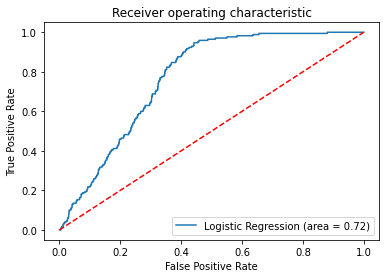

In [46]:
# Plotando curva ROC para portifolio 1
ROC(X_train_P1,X_test_P1,y_train_P1,y_test_P1)

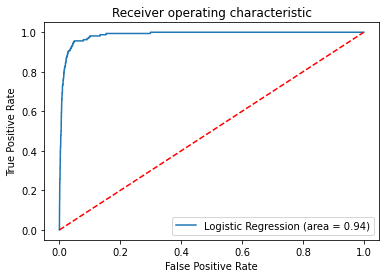

In [47]:
# Plotando curva ROC para portifolio 2
ROC(X_train_P2,X_test_P2,y_train_P2,y_test_P2)

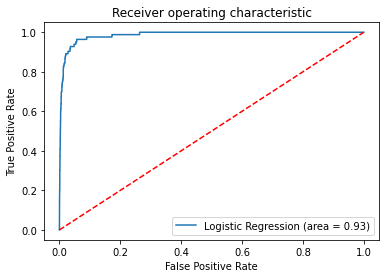

In [48]:
# Plotando curva ROC para portifolio 3
ROC(X_train_P3,X_test_P3,y_train_P3,y_test_P3)

## Obtendo Leads

In [49]:
# Função que retorna dataset com on indexes dos leads
def Leads(y_P,n_leads):
    lr=LogisticRegression(solver='saga',
                          n_jobs=-1,
                          multi_class='ovr')
    lr.fit(EM_enc, y_P)
    proba = pd.DataFrame(lr.predict_proba(EM_enc)[:,1])
    proba = proba.drop(list(y_P[y_P==True].index))
    leads = list(proba.sort_values(0,ascending=False)[0:n_leads].index)
    return EM.loc[leads]

In [50]:
# Retornando 1000 leads para cada portifolio
leads_P1 = Leads(y_P1,1000)
leads_P2 = Leads(y_P2,1000)
leads_P3 = Leads(y_P3,1000)

In [51]:
leads_P1.head()

,id,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,de_natureza_juridica,de_nivel_atividade,de_ramo,de_saude_rescencia,de_saude_tributaria,fl_antt,fl_email,fl_epp,fl_ltda,fl_matriz,fl_me,fl_mei,fl_optante_simei,fl_optante_simples,fl_passivel_iss,fl_rm,fl_sa,fl_simples_irregular,fl_spa,fl_st_especial,fl_telefone,fl_veiculo,idade_emp_cat,idade_empresa_anos,natureza_juridica_macro,nm_divisao,nm_segmento,nu_meses_rescencia,qt_filiais,qt_socios,qt_socios_pf,qt_socios_pj,setor,sg_uf,sg_uf_matriz,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,vl_total_veiculos_leves_grupo,vl_total_veiculos_pesados_grupo
48596,69f7264d4f728d8bc247abee08b8ad6445057e1c485f94...,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",SOCIEDADE EMPRESARIA LIMITADA,MEDIA,COMERCIO VAREJISTA,ATE 1 ANO,CINZA,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,1 a 5,1.145205,ENTIDADES EMPRESARIAIS,COMERCIO VAREJISTA,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,11.0,0,2.0,2.0,0.0,COMERCIO,PI,PI,185457.6,185457.6,0.0,0.0
400300,d1feb059aab4525b803d3e8af67e3b8e13bd8b80bbb14a...,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",EMPRESARIO INDIVIDUAL,ALTA,COMERCIO VAREJISTA,ACIMA DE 1 ANO,VERDE,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,> 20,22.673973,OUTROS,COMERCIO VAREJISTA,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,23.0,0,1.0,1.0,0.0,COMERCIO,AM,AM,2596406.5,2596406.5,2.0,2.0
347228,ccb006b16a4a8620d3b5598c5a5f63d7420811e646e332...,"ATE R$ 81.000,00","ATE R$ 81.000,00",SOCIEDADE EMPRESARIA LIMITADA,ALTA,COMERCIO VAREJISTA,ATE 1 ANO,CINZA,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,<= 1,0.983562,ENTIDADES EMPRESARIAIS,COMERCIO VAREJISTA,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,9.0,0,2.0,2.0,0.0,COMERCIO,PI,PI,61819.2,61819.2,0.0,0.0
77033,9cb0717889adcd7cfda6fb5c47cd91e91039266af48c00...,"DE R$ 360.000,01 A R$ 1.500.000,00","DE R$ 360.000,01 A R$ 1.500.000,00",SOCIEDADE EMPRESARIA LIMITADA,ALTA,COMERCIO VAREJISTA,ATE 1 ANO,CINZA,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,1 a 5,1.175342,ENTIDADES EMPRESARIAIS,COMERCIO VAREJISTA,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,11.0,0,2.0,2.0,0.0,COMERCIO,PI,PI,741830.4,741830.4,0.0,0.0
308433,fc5a50347732234c459cd1f23c33b07977f530679d45b1...,"ATE R$ 81.000,00","ATE R$ 81.000,00",EMPRESARIO INDIVIDUAL,MEDIA,COMERCIO VAREJISTA,ACIMA DE 1 ANO,LARANJA,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,> 20,31.745205,OUTROS,COMERCIO VAREJISTA,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,23.0,0,1.0,1.0,0.0,COMERCIO,AC,AC,61819.2,61819.2,0.0,0.0


In [52]:
leads_P1.describe()

,idade_empresa_anos,nu_meses_rescencia,qt_filiais,qt_socios,qt_socios_pf,qt_socios_pj,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,vl_total_veiculos_leves_grupo,vl_total_veiculos_pesados_grupo
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,11.052460,23.932000,8.662000,1.468000,1.449000,0.019000,4.907199e+05,8.551477e+07,0.700000,0.705000
std,11.097967,13.516067,97.567162,1.519633,1.361342,0.191509,1.686041e+06,1.004754e+09,5.341023,7.194146
min,0.142466,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,4.121280e+04,0.000000,0.000000
25%,1.780822,11.000000,0.000000,1.000000,1.000000,0.000000,5.000000e+04,5.000000e+04,0.000000,0.000000
50%,6.080822,23.000000,0.000000,1.000000,1.000000,0.000000,1.854576e+05,1.854576e+05,0.000000,0.000000
75%,19.945205,25.000000,0.000000,2.000000,2.000000,0.000000,2.100000e+05,2.100000e+05,0.000000,0.000000
max,55.832877,54.000000,1169.000000,18.000000,16.000000,2.000000,4.461286e+07,1.204536e+10,63.000000,86.000000


In [53]:
# Comparando com os dados do portifolio 1
EM.loc[list(P1.index)].describe()

,idade_empresa_anos,nu_meses_rescencia,qt_filiais,qt_socios,qt_socios_pf,qt_socios_pj,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,vl_total_veiculos_leves_grupo,vl_total_veiculos_pesados_grupo
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02,5.550000e+02,555.000000,555.000000
mean,9.327745,22.515315,15.497297,1.326126,1.306306,0.019820,5.949710e+05,4.775337e+08,5.652252,0.960360
std,9.679489,12.031894,327.121597,1.727862,1.709988,0.184126,3.679116e+06,9.576314e+09,93.513623,12.651189
min,0.049315,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,4.121280e+04,0.000000,0.000000
25%,2.457534,22.000000,0.000000,1.000000,1.000000,0.000000,1.236384e+05,1.390932e+05,0.000000,0.000000
50%,5.769863,23.000000,0.000000,1.000000,1.000000,0.000000,2.100000e+05,2.100000e+05,0.000000,0.000000
75%,12.545205,25.000000,0.000000,1.000000,1.000000,0.000000,2.100000e+05,2.100000e+05,0.000000,0.000000
max,51.153425,54.000000,7687.000000,37.000000,37.000000,3.000000,6.954660e+07,2.227618e+11,2134.000000,283.000000


In [54]:
leads_P2.head()

,id,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,de_natureza_juridica,de_nivel_atividade,de_ramo,de_saude_rescencia,de_saude_tributaria,fl_antt,fl_email,fl_epp,fl_ltda,fl_matriz,fl_me,fl_mei,fl_optante_simei,fl_optante_simples,fl_passivel_iss,fl_rm,fl_sa,fl_simples_irregular,fl_spa,fl_st_especial,fl_telefone,fl_veiculo,idade_emp_cat,idade_empresa_anos,natureza_juridica_macro,nm_divisao,nm_segmento,nu_meses_rescencia,qt_filiais,qt_socios,qt_socios_pf,qt_socios_pj,setor,sg_uf,sg_uf_matriz,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,vl_total_veiculos_leves_grupo,vl_total_veiculos_pesados_grupo
62929,5f0a2603c2ff6180475773cd6670d7e85296b2a9687c29...,"DE R$ 30.000.000,01 A R$ 100.000.000,00","DE R$ 30.000.000,01 A R$ 100.000.000,00",SOCIEDADE EMPRESARIA LIMITADA,ALTA,"TRANSPORTE, ARMAZENAGEM E CORREIO",ACIMA DE 1 ANO,VERDE,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,True,True,> 20,25.479452,ENTIDADES EMPRESARIAIS,TRANSPORTE TERRESTRE,TRANSPORTE ARMAZENAGEM E CORREIO,26.0,15,3.0,2.0,1.0,SERVIÇO,RO,RO,35597556.0,52675400.0,26.0,118.0
136925,917c233b758043610d14434190028a270339f3ece6c868...,"DE R$ 30.000.000,01 A R$ 100.000.000,00","DE R$ 30.000.000,01 A R$ 100.000.000,00",SOCIEDADE EMPRESARIA LIMITADA,ALTA,BENS DE CONSUMO,ACIMA DE 1 ANO,VERDE,True,True,False,False,True,False,False,False,False,True,False,False,False,True,False,True,True,15 a 20,16.257534,ENTIDADES EMPRESARIAIS,FABRICACAO DE PRODUTOS ALIMENTICIOS,INDUSTRIAS DE TRANSFORMACAO,23.0,4,3.0,3.0,0.0,INDUSTRIA,RO,RO,41053100.0,43163100.0,13.0,41.0
169955,370cdef2ceff01ce7388f3defce600f4b0a887902d1d5d...,"DE R$ 10.000.000,01 A R$ 30.000.000,00","DE R$ 10.000.000,01 A R$ 30.000.000,00",SOCIEDADE EMPRESARIA LIMITADA,ALTA,"TRANSPORTE, ARMAZENAGEM E CORREIO",ACIMA DE 1 ANO,VERDE,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,True,True,> 20,35.243836,ENTIDADES EMPRESARIAIS,TRANSPORTE TERRESTRE,TRANSPORTE ARMAZENAGEM E CORREIO,24.0,7,2.0,1.0,1.0,SERVIÇO,RO,RO,11282004.0,26804064.0,5.0,77.0
16136,8e3760e3f25c1b9ebc3435141c4b946d92e234753a4a7e...,"DE R$ 10.000.000,01 A R$ 30.000.000,00","DE R$ 10.000.000,01 A R$ 30.000.000,00",SOCIEDADE EMPRESARIA LIMITADA,ALTA,COMERCIO POR ATACADO,ACIMA DE 1 ANO,VERDE,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,True,15 a 20,17.041096,ENTIDADES EMPRESARIAIS,COMERCIO POR ATACADO EXCETO VEICULOS AUTOMOTOR...,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,24.0,2,2.0,1.0,1.0,COMERCIO,MA,MA,18957888.0,26128916.0,6.0,13.0
175399,43c4a86ac2918ffa51d2fb8a504e4ce2284885f25a30f3...,"DE R$ 30.000.000,01 A R$ 100.000.000,00","DE R$ 30.000.000,01 A R$ 100.000.000,00",SERVICO SOCIAL AUTONOMO,ALTA,SERVICOS ADMINISTRATIVOS,ACIMA DE 1 ANO,VERDE,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,> 20,45.542466,ENTIDADES SEM FINS LUCRATIVOS,SERVICOS DE ESCRITORIO DE APOIO ADMINISTRATIVO...,ATIVIDADES ADMINISTRATIVAS E SERVICOS COMPLEME...,23.0,23,1.0,1.0,0.0,SERVIÇO,MA,MA,59243400.0,91723020.0,2.0,2.0


In [55]:
leads_P2.describe()

,idade_empresa_anos,nu_meses_rescencia,qt_filiais,qt_socios,qt_socios_pf,qt_socios_pj,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,vl_total_veiculos_leves_grupo,vl_total_veiculos_pesados_grupo
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,19.175137,24.518000,138.503000,2.848000,2.539000,0.309000,3.571882e+07,1.842294e+09,422.300000,57.416000
std,11.961341,6.062048,871.021951,2.701146,2.396711,0.718356,1.598981e+08,7.390499e+09,3251.260567,217.615246
min,0.956164,0.000000,0.000000,1.000000,1.000000,0.000000,4.121280e+04,4.121280e+04,0.000000,0.000000
25%,10.819178,23.000000,1.000000,1.000000,1.000000,0.000000,2.287310e+06,1.832204e+07,2.000000,1.000000
50%,16.589041,23.000000,4.000000,2.000000,2.000000,0.000000,1.321385e+07,4.329554e+07,7.000000,3.000000
75%,24.704110,24.000000,22.250000,3.000000,3.000000,0.000000,3.268304e+07,9.844806e+07,22.000000,14.000000
max,65.895890,54.000000,9270.000000,24.000000,24.000000,4.000000,3.220832e+09,8.931634e+10,35064.000000,2693.000000


In [56]:
# Comparando com os dados do portifolio 2
EM.loc[list(P2.index)].describe()

,idade_empresa_anos,nu_meses_rescencia,qt_filiais,qt_socios,qt_socios_pf,qt_socios_pj,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,vl_total_veiculos_leves_grupo,vl_total_veiculos_pesados_grupo
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02,5.660000e+02,566.000000,566.000000
mean,9.391481,22.535336,15.199647,1.321555,1.302120,0.019435,5.866256e+05,4.682570e+08,5.542403,0.941696
std,9.707189,11.990172,323.928492,1.711738,1.693996,0.182346,3.643623e+06,9.482864e+09,92.602132,12.528133
min,0.049315,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,4.121280e+04,0.000000,0.000000
25%,2.469178,22.000000,0.000000,1.000000,1.000000,0.000000,1.236384e+05,1.313658e+05,0.000000,0.000000
50%,5.846575,23.000000,0.000000,1.000000,1.000000,0.000000,2.100000e+05,2.100000e+05,0.000000,0.000000
75%,12.622603,25.000000,0.000000,1.000000,1.000000,0.000000,2.100000e+05,2.100000e+05,0.000000,0.000000
max,51.153425,54.000000,7687.000000,37.000000,37.000000,3.000000,6.954660e+07,2.227618e+11,2134.000000,283.000000


In [57]:
leads_P3.head()

,id,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,de_natureza_juridica,de_nivel_atividade,de_ramo,de_saude_rescencia,de_saude_tributaria,fl_antt,fl_email,fl_epp,fl_ltda,fl_matriz,fl_me,fl_mei,fl_optante_simei,fl_optante_simples,fl_passivel_iss,fl_rm,fl_sa,fl_simples_irregular,fl_spa,fl_st_especial,fl_telefone,fl_veiculo,idade_emp_cat,idade_empresa_anos,natureza_juridica_macro,nm_divisao,nm_segmento,nu_meses_rescencia,qt_filiais,qt_socios,qt_socios_pf,qt_socios_pj,setor,sg_uf,sg_uf_matriz,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,vl_total_veiculos_leves_grupo,vl_total_veiculos_pesados_grupo
140833,a907608ecd3dd3258b0069d72117436dd82d94884f95a8...,"DE R$ 30.000.000,01 A R$ 100.000.000,00","DE R$ 30.000.000,01 A R$ 100.000.000,00",MUNICIPIO,ALTA,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",ACIMA DE 1 ANO,VERDE,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,> 20,31.824658,OUTROS,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,23.0,1,1.0,1.0,0.0,SERVIÇO,RO,RO,36267264.0,36267264.0,36.0,20.0
442485,564abd56d9463691fbf1084a0587074d7d8b82f3b12a24...,"DE R$ 30.000.000,01 A R$ 100.000.000,00","DE R$ 30.000.000,01 A R$ 100.000.000,00",MUNICIPIO,ALTA,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",ACIMA DE 1 ANO,VERDE,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,> 20,48.857534,OUTROS,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,23.0,1,1.0,1.0,0.0,SERVIÇO,MA,MA,40182480.0,40182480.0,7.0,7.0
175399,43c4a86ac2918ffa51d2fb8a504e4ce2284885f25a30f3...,"DE R$ 30.000.000,01 A R$ 100.000.000,00","DE R$ 30.000.000,01 A R$ 100.000.000,00",SERVICO SOCIAL AUTONOMO,ALTA,SERVICOS ADMINISTRATIVOS,ACIMA DE 1 ANO,VERDE,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,> 20,45.542466,ENTIDADES SEM FINS LUCRATIVOS,SERVICOS DE ESCRITORIO DE APOIO ADMINISTRATIVO...,ATIVIDADES ADMINISTRATIVAS E SERVICOS COMPLEME...,23.0,23,1.0,1.0,0.0,SERVIÇO,MA,MA,59243400.0,91723020.0,2.0,2.0
346208,65fc14218ee0103cb9dc77307c81412a3f82ea353ae807...,"DE R$ 10.000.000,01 A R$ 30.000.000,00","DE R$ 30.000.000,01 A R$ 100.000.000,00",SERVICO SOCIAL AUTONOMO,ALTA,SERVICOS DE EDUCACAO,ACIMA DE 1 ANO,VERDE,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,15 a 20,18.638356,ENTIDADES SEM FINS LUCRATIVOS,EDUCACAO,EDUCACAO,26.0,10,1.0,1.0,0.0,SERVIÇO,MA,MA,23800392.0,71559660.0,13.0,0.0
237500,3eeab91fce96724fa85bb6f5125325f87e8d29af2cde65...,"DE R$ 30.000.000,01 A R$ 100.000.000,00","DE R$ 30.000.000,01 A R$ 100.000.000,00",MUNICIPIO,ALTA,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",ACIMA DE 1 ANO,VERDE,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,> 20,21.871233,OUTROS,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,23.0,1,1.0,1.0,0.0,SERVIÇO,MA,MA,71143600.0,71353600.0,3.0,0.0


In [58]:
leads_P3.describe()

,idade_empresa_anos,nu_meses_rescencia,qt_filiais,qt_socios,qt_socios_pf,qt_socios_pj,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,vl_total_veiculos_leves_grupo,vl_total_veiculos_pesados_grupo
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,19.912301,24.894000,44.344000,2.217000,1.996000,0.221000,4.440184e+07,1.509899e+09,178.519000,38.482000
std,12.813115,6.499308,319.445405,2.428953,2.184664,0.592038,3.431137e+08,6.566262e+09,1418.329365,163.957451
min,0.964384,9.000000,0.000000,1.000000,1.000000,0.000000,4.121280e+04,5.000000e+04,0.000000,0.000000
25%,10.263699,23.000000,0.000000,1.000000,1.000000,0.000000,2.100000e+05,1.577973e+07,1.000000,0.000000
50%,16.819178,23.000000,2.000000,1.000000,1.000000,0.000000,1.143655e+07,4.038854e+07,6.000000,2.000000
75%,27.442466,24.000000,16.000000,2.000000,2.000000,0.000000,3.492785e+07,9.181992e+07,21.000000,12.000000
max,52.443836,54.000000,9270.000000,26.000000,26.000000,4.000000,9.961906e+09,8.062172e+10,35064.000000,2693.000000


In [59]:
# Comparando com os dados do portifolio 3
EM.loc[list(P3.index)].describe()

,idade_empresa_anos,nu_meses_rescencia,qt_filiais,qt_socios,qt_socios_pf,qt_socios_pj,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,vl_total_veiculos_leves_grupo,vl_total_veiculos_pesados_grupo
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,2.650000e+02,2.650000e+02,265.000000,265.000000
mean,10.126493,22.833962,31.471698,1.339623,1.324528,0.015094,4.878328e+05,9.851177e+08,11.049057,1.603774
std,9.971752,11.574314,473.314818,2.264209,2.259735,0.149995,2.143570e+06,1.385387e+10,135.001184,18.045754
min,0.049315,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,5.000000e+04,0.000000,0.000000
25%,3.158904,22.000000,0.000000,1.000000,1.000000,0.000000,2.100000e+05,2.100000e+05,0.000000,0.000000
50%,6.745205,23.000000,0.000000,1.000000,1.000000,0.000000,2.100000e+05,2.100000e+05,0.000000,0.000000
75%,14.465753,25.000000,0.000000,1.000000,1.000000,0.000000,2.100000e+05,2.100000e+05,0.000000,0.000000
max,51.153425,54.000000,7687.000000,37.000000,37.000000,2.000000,2.987928e+07,2.227618e+11,2134.000000,283.000000
